In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
df.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    159 non-null    object 
 1   Weight     159 non-null    float64
 2   LengthVer  159 non-null    float64
 3   LengthDia  159 non-null    float64
 4   LengthCro  159 non-null    float64
 5   Height     159 non-null    float64
 6   Width      159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
#check for null values

df.isnull().values.any()

False

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
LengthVer,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
LengthDia,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
LengthCro,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [8]:
#lengthVer, lengthDia and lengthCro has more data between 75%-max than min-75%

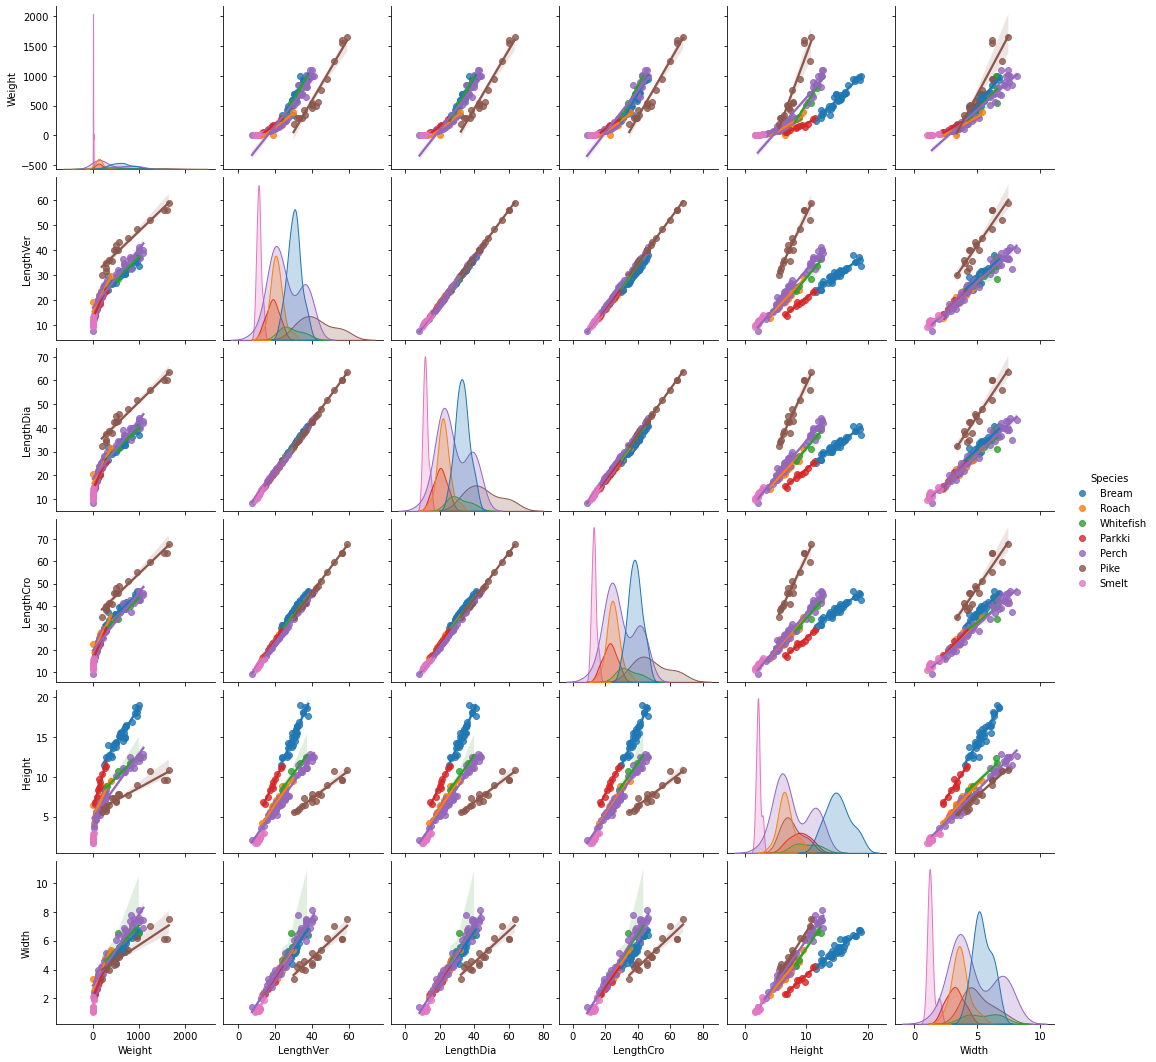

In [9]:
#check the graph
sns.pairplot(df,kind="reg", diag_kind='kde',hue = "Species")

In [10]:
df.corr()

,Weight,LengthVer,LengthDia,LengthCro,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
LengthVer,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
LengthDia,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
LengthCro,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

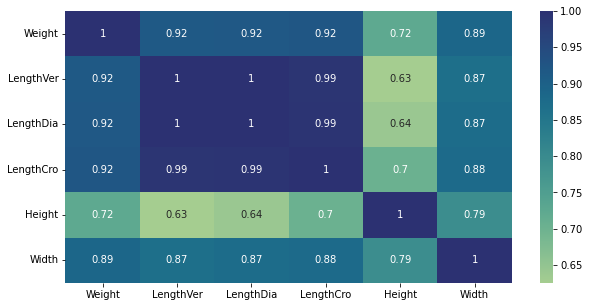

In [11]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap = "crest")

In [12]:
dfw = df["Weight"]
dfwq1 = dfw.quantile(0.25)
dfwq3 = dfw.quantile(0.75)
dfw_IQR = dfwq3 - dfwq1
print("Q1 - 25% - ",dfwq1)
print("Q3 - 75% - ",dfwq3)
print("IQR -      ", dfw_IQR)
dfw_lowerend = dfwq1 - (1.5 * dfw_IQR)
dfw_upperend = dfwq3 + (1.5 * dfw_IQR)
print("lowerend = ", dfw_lowerend)
print("upperend = ", dfw_upperend)

Q1 - 25% -  120.0
Q3 - 75% -  650.0
IQR -       530.0
lowerend =  -675.0
upperend =  1445.0


In [13]:
dfw_outliers = dfw[(dfw < dfw_lowerend ) | (dfw>dfw_upperend)]
print(dfw_outliers)

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64


In [14]:
dflv = df["LengthVer"]
dflv_q1 = dflv.quantile(0.25)
dflv_q3 = dflv.quantile(0.75)
dflv_iqr = dflv_q3 - dflv_q1
dflv_lowerend = dflv_q1 - (1.5 * dflv_iqr)
dflv_upperend = dflv_q3 + (1.5 * dflv_iqr)
dflv_outliers = dflv[(dflv < dflv_lowerend) | (dflv > dflv_upperend)]
dflv_outliers

142    56.0
143    56.0
144    59.0
Name: LengthVer, dtype: float64

In [15]:
dfld = df["LengthDia"]
dfld_q1 = dfld.quantile(0.25)
dfld_q3 = dfld.quantile(0.75)
dfld_iqr = dfld_q3 - dfld_q1
dfld_lowerend = dfld_q1 - (1.5 * dfld_iqr)
dfld_upperend = dfld_q3 + (1.5 * dfld_iqr)
dfld_outliers = dfld[(dfld < dfld_lowerend) | (dfld > dfld_upperend)]
dfld_outliers

142    60.0
143    60.0
144    63.4
Name: LengthDia, dtype: float64

In [16]:
df[142:145]

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [17]:
df.drop([142,143,144], axis=0,inplace = True) # dropping the outlier data based on the above data 

In [18]:
df.shape

(156, 7)

In [19]:
X = df.iloc[:,2:7]
y = df["Weight"]

Text(0.5, 0, 'Width')

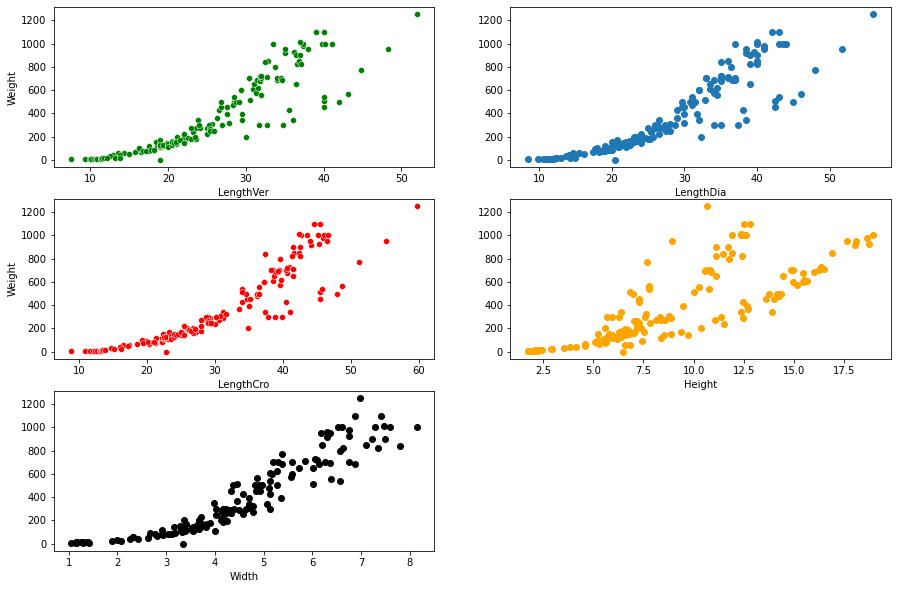

In [20]:
plt.figure(figsize = (15,10))

plt.subplot(3,2,1)
sns.scatterplot(x = X["LengthVer"],y =  y, data = df, color = "green")

plt.subplot(3,2,2)
plt.scatter(x = X["LengthDia"],y =  y)
plt.xlabel("LengthDia")

plt.subplot(3,2,3)
sns.scatterplot(x = X["LengthCro"],y= y, color = "red")

plt.subplot(3,2,4)
plt.scatter(x = X["Height"],y =  y, color = "orange")
plt.xlabel("Height")

plt.subplot(3,2,5)
plt.scatter(x = X["Width"],y =  y,color = "black")
plt.xlabel("Width")

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

print("Coeff", model.coef_)
print ("Intercept", model.intercept_)

Coeff [ 89.93843031 -32.68619524 -37.53063323  33.07275974  60.72005923]
Intercept -441.0088725388182


In [24]:
from sklearn.model_selection import *

cross_val_predict_train = cross_val_predict(model, X_train, y_train, cv=10)
model.score(X_train,cross_val_predict_train)

0.9981679137095233

In [25]:
#take a mean score among the cv scores

cross_val_score_train = cross_val_score(model, X_train, y_train, cv=10)
print(cross_val_score_train.mean())

0.8835411966576625


In [26]:
from sklearn.metrics import r2_score
r2_score(y_train,cross_val_predict_train )

0.8994756895733825

In [27]:
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))
print(r2_score(y_test, y_pred))

0.867196438874247
0.867196438874247


In [28]:
from sklearn import metrics
metrics.mean_squared_error(y_test, y_pred)


13604.815100516938

Text(0, 0.5, 'Weights')

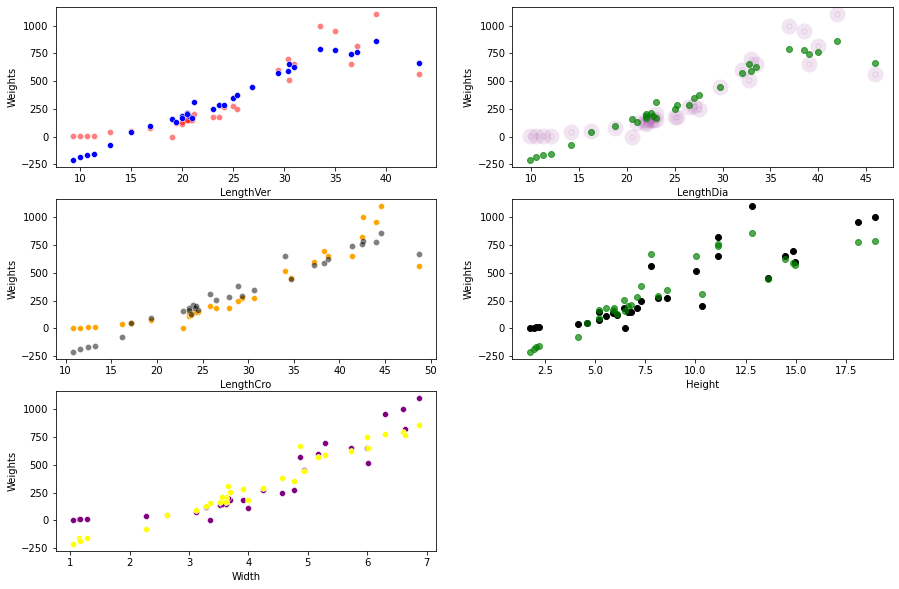

In [29]:
plt.figure(figsize = (15,10))

plt.subplot(3,2,1)
sns.scatterplot(x = X_test["LengthVer"], y = y_test, alpha = 0.5, color = "red")
sns.scatterplot(x = X_test["LengthVer"], y = y_pred, alpha = 1, color = "blue")
plt.xlabel("LengthVer")
plt.ylabel("Weights")

plt.subplot(3,2,2)
plt.scatter(x = X_test["LengthDia"], y = y_test, alpha = 0.1, color = "purple", linewidth = 10)
plt.scatter(x = X_test["LengthDia"], y = y_pred, alpha = 0.68, color = "green")
plt.xlabel("LengthDia")
plt.ylabel("Weights")

plt.subplot(3,2,3)
sns.scatterplot(x = X_test["LengthCro"], y = y_test, alpha = 1, color = "orange")
sns.scatterplot(x = X_test["LengthCro"], y = y_pred, alpha = 0.5, color = "black")
plt.xlabel("LengthCro")
plt.ylabel("Weights")

plt.subplot(3,2,4)
plt.scatter(x = X_test["Height"], y = y_test, alpha = 1, color = "black")
plt.scatter(x = X_test["Height"], y = y_pred, alpha = 0.68, color = "green")
plt.xlabel("Height")
plt.ylabel("Weights")

plt.subplot(3,2,5)
sns.scatterplot(x = X_test["Width"], y = y_test, alpha = 1, color = "purple")
sns.scatterplot(x = X_test["Width"], y = y_pred, alpha = 1, color = "yellow")
plt.xlabel("Width")
plt.ylabel("Weights")

In [30]:
final = pd.DataFrame({"Actual Weight":y_test, "Predicted Weight":y_pred, "Difference weights": y_test-y_pred})
final.reset_index(drop = True)

,Actual Weight,Predicted Weight,Difference weights
0,650.0,746.034615,-96.034615
1,51.5,44.698577,6.801423
2,180.0,282.287266,-102.287266
3,955.0,777.208209,177.791791
4,40.0,-74.802289,114.802289
5,0.0,159.717948,-159.717948
6,600.0,569.637735,30.362265
7,514.0,651.097615,-137.097615
8,272.0,349.707917,-77.707917
9,9.8,-163.684074,173.484074
